In [1]:
import pandas as pd
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]


In [2]:
yes_no = {
    'Yes': True,
    'No': False
}

questions = ['Have you seen any of the 6 films in the Star Wars franchise?', 'Do you consider yourself to be a fan of the Star Wars film franchise?']

for x in questions:
    star_wars[x] = star_wars[x].map(yes_no)
    print (star_wars[x].value_counts())

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [3]:
import numpy as np

moviemappings={
    'Star Wars: Episode I  The Phantom Menace': True, 
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.NaN: False
}

for x in star_wars.columns[3:9]:
    star_wars[x] = star_wars[x].map(moviemappings) 


In [4]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

print (star_wars.head())

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True             
2  3.292880e+09                                              False             
3  3.292765e+09                                               True             
4  3.292763e+09                                               True             
5  3.292731e+09                                               True             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

  seen_1 seen_2 seen_3 seen_4 seen_5 seen_6  \
1   True   True   Tru

In [5]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

print (star_wars.head())

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True             
2  3.292880e+09                                              False             
3  3.292765e+09                                               True             
4  3.292763e+09                                               True             
5  3.292731e+09                                               True             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

  seen_1 seen_2 seen_3 seen_4 seen_5 seen_6  ranking_1  \
1   True  

In [9]:
avg_ranking = star_wars[star_wars.columns[9:15]].mean()
print (avg_ranking)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


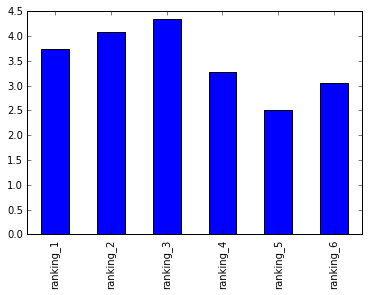

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

avg_ranking.plot(kind='bar')
plt.show()

In this graph, lower on the Y-Axis is better. Ranking 1-3 are a part of the prequel trilogy and ranking 4-6 belong to the original trilogy. Unsurprisingly, the original trilogy ranked higher in the survey than the prequels. 

In [11]:
totalwatched = star_wars[star_wars.columns[3:9]].sum()
print (totalwatched)

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


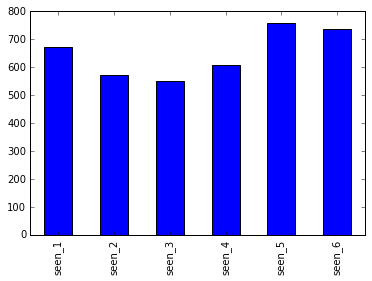

In [12]:
totalwatched.plot(kind='bar')

This reinforces the results we got previously where the original trilogy got higher ratings, as more people watched the original trilogy.

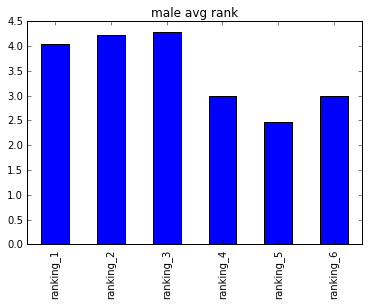

In [18]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

males_avg_ranking = males[males.columns[9:15]].mean()
males_avg_ranking.plot(kind='bar', title='male avg rank')


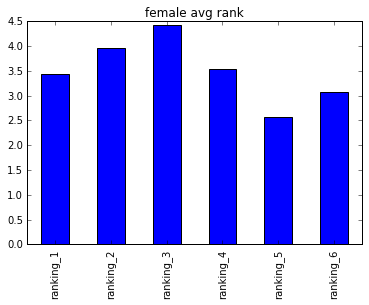

In [17]:
females_avg_ranking = females[females.columns[9:15]].mean()
females_avg_ranking.plot(kind='bar', title='female avg rank')


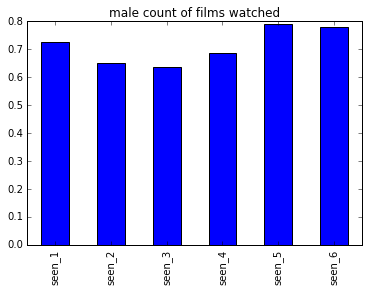

In [19]:
males_watched = males[males.columns[3:9]].mean()
males_watched.plot(kind='bar', title='male count of films watched')

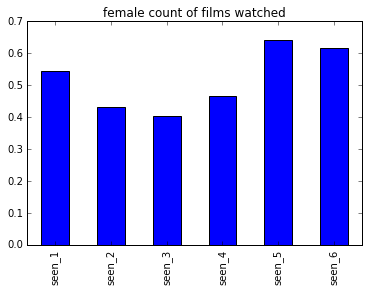

In [20]:
females_watched = females[females.columns[3:9]].mean()
females_watched.plot(kind='bar', title='female count of films watched')

More males watched the prequels but liked the trilogy less than the female respondents did.